# Application Face Mask Detector
## Perform Face Mask Detection in static images

**Verify program using static image --> do prediction :**
- if ***predicitons < 0*** => mask present. 
- if ***predictions > 0*** => no mask

### 1. Image from training dataset (With Mask)

In [1]:
# Includes all library installed using pip
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Load model
new_model = tf.keras.models.load_model("mask_detector_model.h5")

In [3]:
frame = cv2.imread('Dataset/Face_Mask/00003_Mask.jpg')

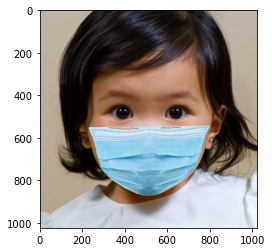

In [4]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)) #we try predict with this picture 

In [5]:
final_image = cv2.resize(frame, (224,224)) #resize
final_image = np.expand_dims(final_image,axis = 0) #dimension
final_image = final_image/255.0 #normalization

In [6]:
Predictions = new_model.predict(final_image) #calculate prediction

In [7]:
Predictions # result ==> predictions < 0 ---> mask present

array([[-36.910202]], dtype=float32)

### 2. Image from training dataset (Without mask)

In [8]:
frame2 = cv2.imread('Dataset/No_Mask/00003.png')

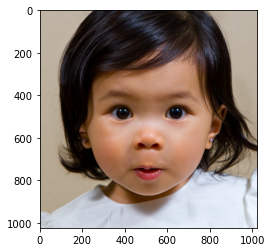

In [9]:
plt.imshow(cv2.cvtColor(frame2, cv2.COLOR_BGR2RGB))

In [10]:
final_image2 = cv2.resize(frame2, (224,224))
final_image2 = np.expand_dims(final_image2,axis = 0)
final_image2 = final_image2/255.0

In [11]:
Predictions2 = new_model.predict(final_image2)

In [12]:
Predictions2 # result ==> predictions > 0 ---> no mask

array([[17.415653]], dtype=float32)

### 3. Verify program using unknown image (Without Mask)

In [13]:
frame3 = cv2.imread('Example/example_1.jpg')

In [14]:
frame3.shape

(480, 852, 3)

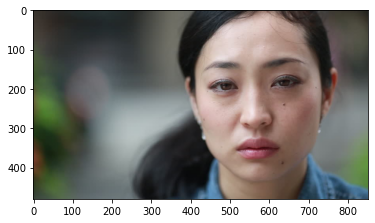

In [15]:
plt.imshow(cv2.cvtColor(frame3, cv2.COLOR_BGR2RGB))

***as this is an unknown image, we must first detect faces from the image using haarcascade***

In [16]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [17]:
gray = cv2.cvtColor(frame3, cv2.COLOR_RGB2GRAY)

In [18]:
gray.shape

(480, 852)

In [19]:
faces = faceCascade.detectMultiScale(gray, 1.1, 4)
for x,y,w,h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame3[y:y+h, x:x+w]
    cv2.rectangle(frame3, (x,y), (x+w, y+h), (255, 0, 0), 2) #put rectangle on face
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0:
        print("Face not detected")
    else:
        for(ex, ey, ew, eh) in facess:
            face_roi = roi_color[ey: ey+eh, ex:ex +ew] #crop face out of image

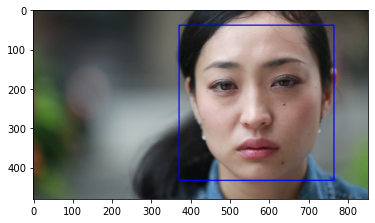

In [20]:
# show image with face detected
plt.imshow(cv2.cvtColor(frame3, cv2.COLOR_BGR2RGB))

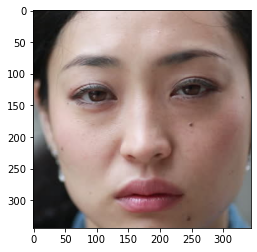

In [21]:
#show face_roi
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [22]:
final_image3 = cv2.resize(face_roi, (224,224)) #resize
final_image3 = np.expand_dims(final_image3,axis = 0)
final_image3 = final_image3/255.0

In [23]:
#Apply prediction using our model
Predictions3 = new_model.predict(final_image3)

In [24]:
Predictions3 # result ===> predictions > 0 ---> no face mask

array([[8.11138]], dtype=float32)

### 4. Verify program using unknown image (with mask)

In [25]:
frame4 = cv2.imread('Example/example_2.jpg')

In [26]:
frame4.shape

(552, 533, 3)

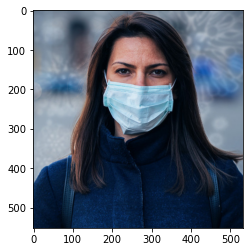

In [27]:
plt.imshow(cv2.cvtColor(frame4, cv2.COLOR_BGR2RGB))

**as this is an unknown image, we must first detect faces from the image using haarcascade**

In [29]:
gray = cv2.cvtColor(frame4, cv2.COLOR_RGB2GRAY)

In [30]:
gray.shape

(552, 533)

In [31]:
faces = faceCascade.detectMultiScale(gray, 1.1, 4)
for x,y,w,h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame4[y:y+h, x:x+w]
    cv2.rectangle(frame4, (x,y), (x+w, y+h), (255, 0, 0), 2) #put rectangle on face
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0:
        print("Face not detected")
    else:
        for(ex, ey, ew, eh) in facess:
            face_roi = roi_color[ey: ey+eh, ex:ex +ew] #crop face out of image

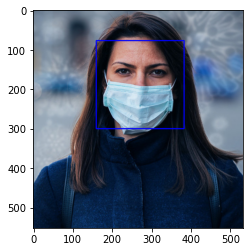

In [32]:
plt.imshow(cv2.cvtColor(frame4, cv2.COLOR_BGR2RGB))

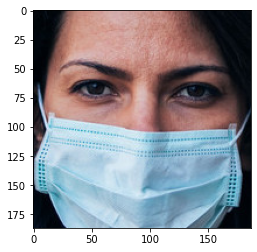

In [33]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [34]:
final_image4 = cv2.resize(face_roi, (224,224)) #resize
final_image4 = np.expand_dims(final_image4,axis = 0)
final_image4 = final_image4/255.0

In [35]:
Predictions4 = new_model.predict(final_image4)

In [36]:
Predictions4 # result ===> predictions < 0 ---> face mask

array([[-34.856842]], dtype=float32)